In [1]:
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("hf://datasets/dazzle-nu/CIS435-CreditCardFraudDetection/fraudTrain.csv")
df.head()

/Users/romacarapetean/Desktop/Projects/Credit_Card_Fraud_Detection/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Unnamed: 23,6006
0,0,1/1/19 0:00,2.703190e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,3495,"Psychologist, counselling",3/9/88,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,NaN,NaN
1,1,1/1/19 0:00,6.304230e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,149,Special educational needs teacher,6/21/78,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN,NaN
2,2,1/1/19 0:00,3.885950e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,4154,Nature conservation officer,1/19/62,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,NaN,NaN
3,3,1/1/19 0:01,3.534090e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,1939,Patent attorney,1/12/67,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN,NaN
4,4,1/1/19 0:03,3.755340e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,99,Dance movement psychotherapist,3/28/86,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,NaN,NaN


### Exploratory Data Visualization
This section provides quick visual checks: missing values, numeric distributions, correlations, class balance, and amount-by-class if relevant columns exist.


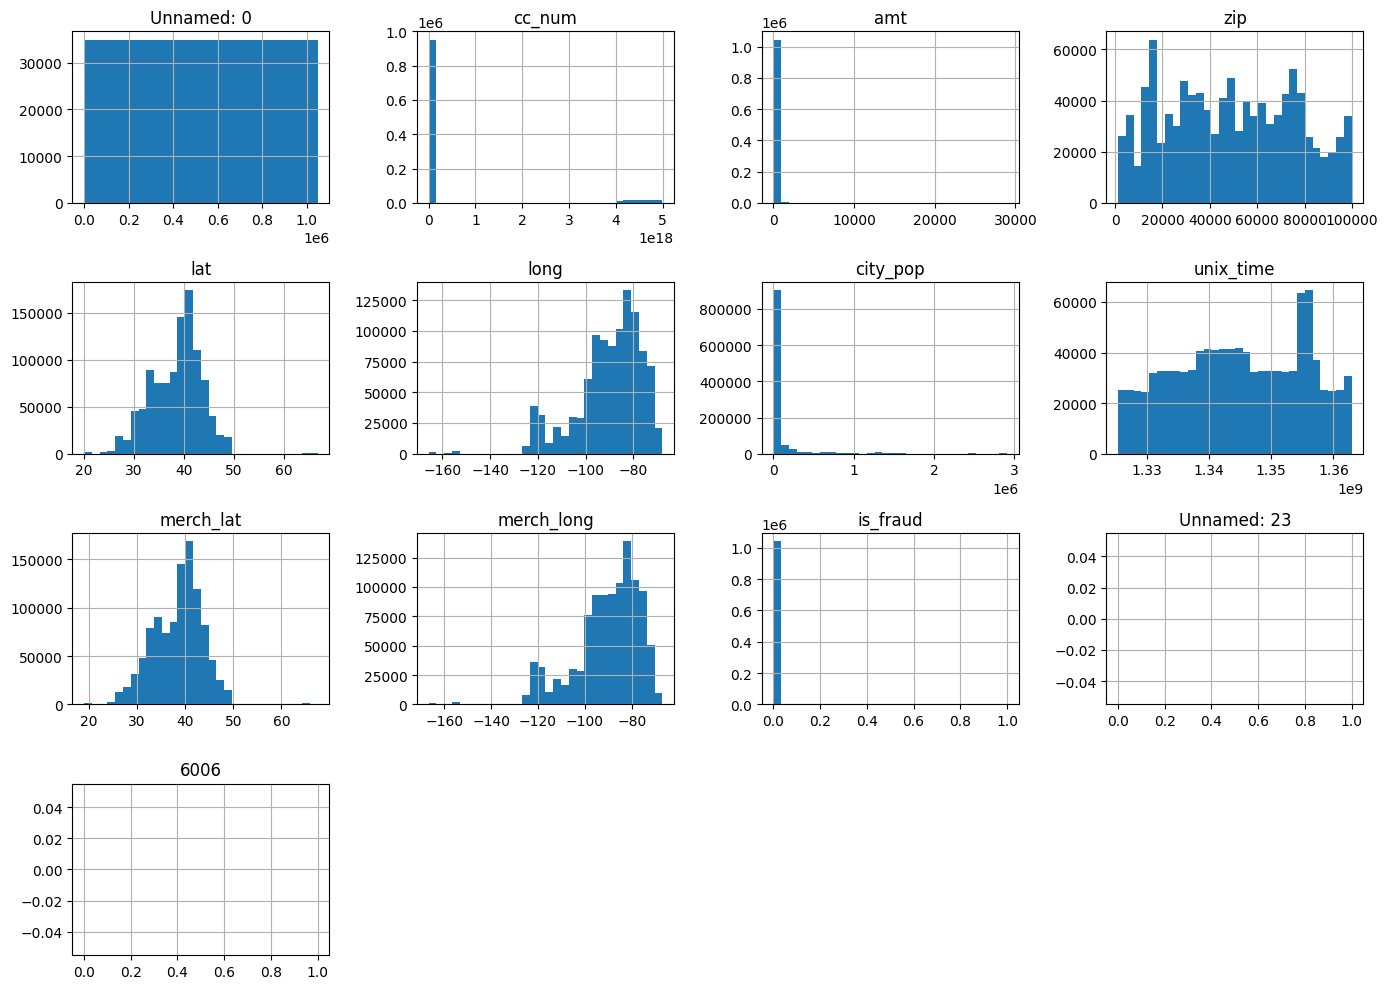

In [9]:
# Numeric distributions
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
if numeric_cols:
    df[numeric_cols].hist(bins=30, figsize=(14, 10))
    plt.tight_layout()
    plt.show()
else:
    print('No numeric columns found.')


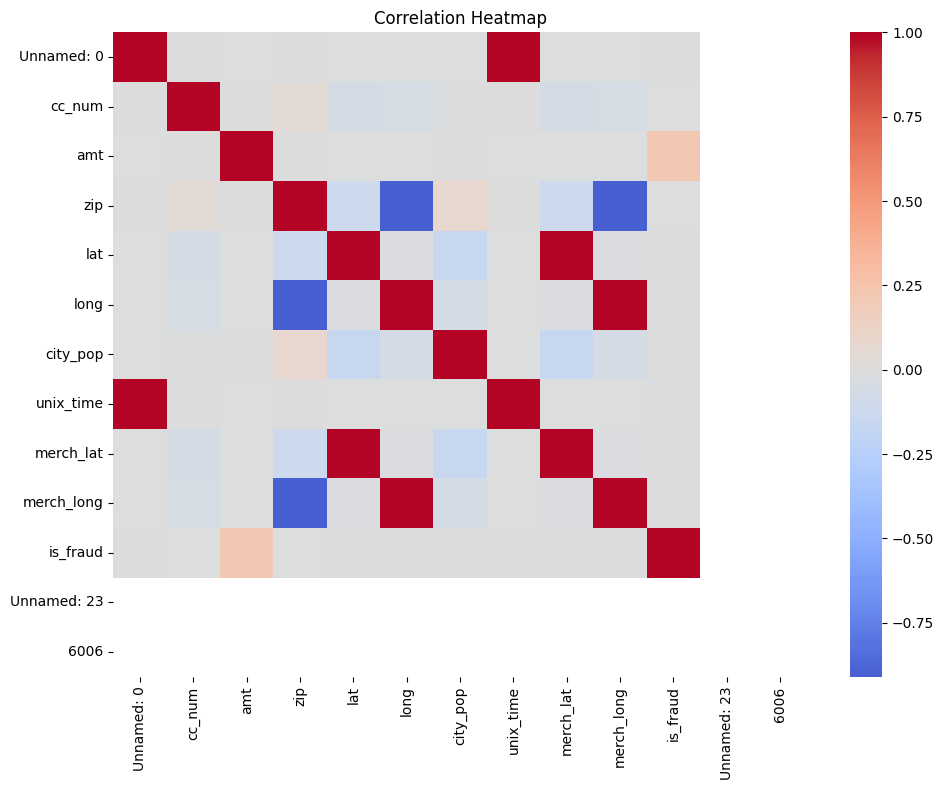

In [6]:
# Correlation heatmap (numeric)
if len(numeric_cols) >= 2:
    corr = df[numeric_cols].corr(numeric_only=True)
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, cmap='coolwarm', center=0, square=False)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for correlation heatmap.')


/var/folders/wf/dfzg0wzd2x30v9bhslv20mcm0000gn/T/ipykernel_14450/3733060302.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values, palette='viridis')


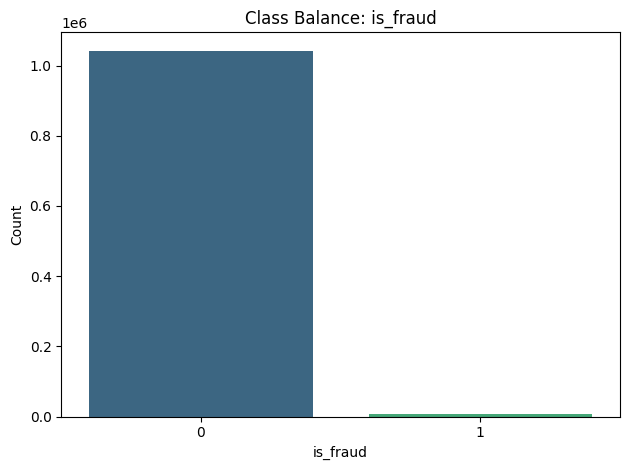

In [10]:
# Class balance (if label column present)
label_candidates = [c for c in df.columns if c.lower() in {'is_fraud'}]
if label_candidates:
    label_col = label_candidates[0]
    counts = df[label_col].value_counts()
    sns.barplot(x=counts.index.astype(str), y=counts.values, palette='viridis')
    plt.title(f'Class Balance: {label_col}')
    plt.xlabel(label_col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()
else:
    print('No obvious label column found for class balance plot.')


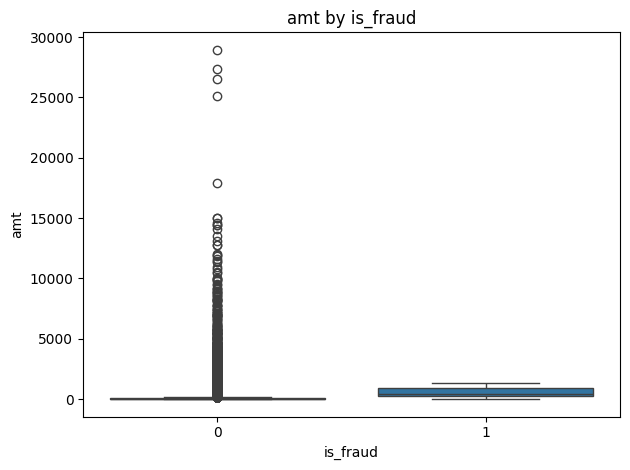

In [8]:
# Amount-by-class boxplot if both columns exist
amount_candidates = [c for c in df.columns if c.lower() in {'amt', 'amount', 'transaction_amt', 'transaction_amount'}]
if label_candidates and amount_candidates:
    label_col = label_candidates[0]
    amount_col = amount_candidates[0]
    sns.boxplot(x=df[label_col].astype(str), y=df[amount_col])
    plt.title(f'{amount_col} by {label_col}')
    plt.xlabel(label_col)
    plt.ylabel(amount_col)
    plt.tight_layout()
    plt.show()
else:
    print('No suitable label/amount columns for boxplot.')
